In [3]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/60/ec/9e0d1b38d30ba82e32763158bb9c1b7aaaf8b104268251db9e734d2adb0a/scikit_learn-1.4.0-1-cp312-cp312-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for numpy<2.0,>=1.19.5 from https://files.pythonhosted.org/packages/95/12/8f2020a8e8b8383ac0177dc9570aad031a3beb12e38847f7129bacd96228/numpy-1.26.4-cp312-cp312-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 411.0 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/0d/4a/b2b2cae0c5dfd46361245a67102886ed7188805bdf7044e36fe838bbcf26/scipy-1.12.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440

In [4]:
from sklearn import datasets
iris = datasets.load_iris()

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.data

In [9]:
type(iris.data)

numpy.ndarray

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
type(iris.target)

numpy.ndarray

In [13]:
# only use the first 100 rows and the last two columns
X = iris.data[0:100,2:4]

# only use first 100 rows
y = iris.target[0:100]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [15]:
from sklearn.linear_model import SGDClassifier

# the alpha is used for the learning rate, which can impact overfitting vs underfitting,
# something we haven't discussed yet, but just note that a higher value of alpha more likely
# to underfit. Can try changing alpha=0.05 if the model doesn't achieve 100% accuracy.
clf = SGDClassifier(loss="perceptron", alpha=0.01)

clf.fit(X_train, y_train)

SGDClassifier(alpha=0.01, loss='perceptron')

In [17]:
from sklearn.metrics import accuracy_score

# Check the accuracy on the test data
accuracy_test=accuracy_score(y_test, clf.predict(X_test))

# Check accuracy on the training data
accuracy_train=accuracy_score(y_train, clf.predict(X_train))

print(accuracy_test)
print(accuracy_train)

1.0
1.0


In [21]:
import numpy as np
print(clf.classes_)


[0 1]


In [22]:
print(clf.coef_)

[[1.92077651 0.74910284]]


In [23]:
print(clf.intercept_)

[-5.00901528]


In [24]:
print(X_train[0])

[1.5 0.2]


In [25]:
print(clf.decision_function([X_train[0]]))

[-1.97802995]


In [26]:
print(np.sum( clf.coef_*X_train[0]) + clf.intercept_)

[-1.97802995]


In [27]:
print(clf.decision_function(X_train))

[-1.97802995  4.75813328 -1.90311966 -2.1701076  -2.36218525 -2.82125083
  4.80039036 -1.97802995  5.55909708 -1.82820938 -1.78595229 -2.5542629
 -1.97802995  4.87530064  4.60831271  5.06737829  3.57301417  4.41623506
  2.46280535 -2.1701076   5.14228858  3.61527125  3.11394858 -1.97802995
 -2.36218525 -1.05989877 -2.1701076   3.95716947  3.8400021   2.07865004
  4.75813328 -2.09519731  3.38093652  3.64792445  2.87961385 -1.59387464
  2.84696065  3.8400021  -1.51896436  4.22415741  3.30602623  3.53075709
 -2.5542629  -1.82820938  2.46280535  5.52644388 -1.78595229  4.91755773
 -1.36914379  5.98550947 -1.63613173 -1.20971934 -2.05294023 -2.36218525
 -1.97802995 -2.9384182   5.8683421  -2.36218525  4.34132477  4.83304356
  4.18190032  4.75813328 -2.1701076  -2.28727496  4.03207975 -1.78595229
 -2.09519731 -2.28727496  5.52644388 -1.97802995]


In [28]:
print(clf.predict(X_train))

[0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1
 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0]


In [29]:
print(clf.coef_)

[[1.92077651 0.74910284]]


In [30]:
print(clf.intercept_)

[-5.00901528]


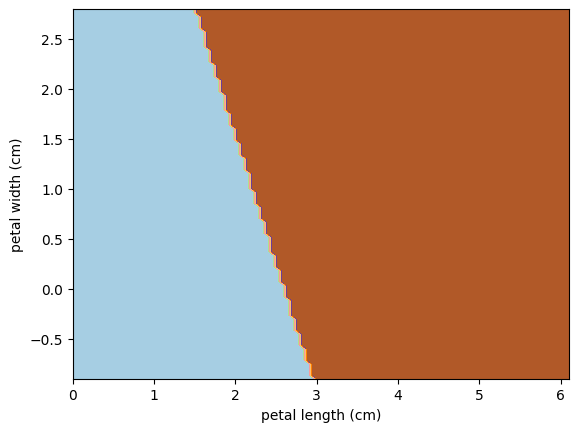

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.inspection import DecisionBoundaryDisplay

# get current axis (gca) or create new ones if none exist.
ax = plt.gca()

# use the DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(
    clf, # the trained model
    X,   # the independent variables -- must be 2D!!
    cmap=plt.cm.Paired, # the color map
    ax=ax,  # the axis
    response_method="predict",  # the prediction method
    xlabel="petal length (cm)",  # lables
    ylabel="petal width (cm)",
)

/var/folders/r1/x17z5wq913s3rgkc6t0y_m0h0000gn/T/ipykernel_3167/1333617882.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


(0.795, 5.305, 0.015, 1.885)

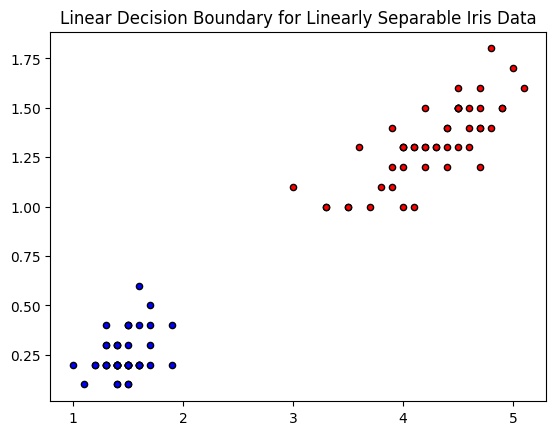

In [34]:
import numpy as np
# we use two colors because there are two target classes ('setosa', 'versicolor')
colors = "br"
# Plot also the training points:
# iterate over each of the classes (and colors) and make a plot
for i, color in zip(clf.classes_, colors):
    # pick out the indexes where the dependent var equals i
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        cmap=plt.cm.Paired,
        edgecolor="black",
        s=20,
    )
plt.title("Linear Decision Boundary for Linearly Separable Iris Data")
# Set limits just large enough to show all data, then disable further autoscaling.
plt.axis("tight")

In [35]:
# We want to use the entire dataset, so we set X and y differently:
X = iris.data
y = iris.target

# The rest is the same:
# first, we split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
# next we
clf = SGDClassifier(loss="perceptron", alpha=0.01)
clf.fit(X_train, y_train)

# Check the accuracy on the test data
accuracy_test=accuracy_score(y_test, clf.predict(X_test))
# Check accuracy on the training data
accuracy_train=accuracy_score(y_train, clf.predict(X_train))
print(f"Train accuracy: {accuracy_train}; Test accuracy: {accuracy_test}")

Train accuracy: 0.819047619047619; Test accuracy: 0.7555555555555555


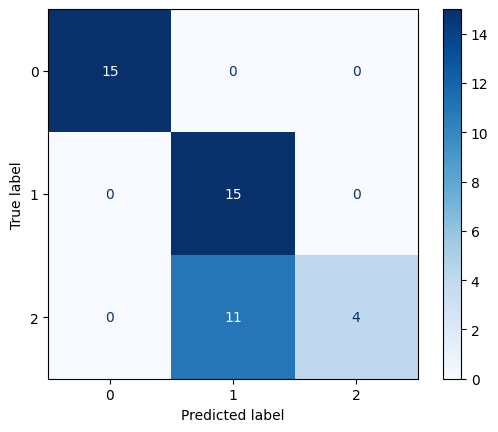

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,
                                               cmap=plt.cm.Blues,normalize=None)

HANDS ON LAB

In [2]:
pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/e1/1e/d708cda584a2d70e6d3c930d102d07ee3d65bec3b2861f416b086cc518a8/pandas-2.2.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/9c/3d/a121f284241f08268b21359bd425f7d4825cffc5ac5cd0e1b3d82ffd2b10/pytz-2024.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/65/58/f9c9e6be752e9fcb8b6a0ee9fb87e6e7a1f6bcab2cdc73f02bb7ba91ada0/tzdata-2024.1-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 18.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 10.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 9.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgr

In [3]:
import pandas as pd

/var/folders/r1/x17z5wq913s3rgkc6t0y_m0h0000gn/T/ipykernel_69741/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
headers = ["word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our","word_freq_over","word_freq_remove","word_freq_internet","word_freq_order","word_freq_mail","word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses","word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit","word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp","word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab	","word_freq_labs","word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85","word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct","word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project","word_freq_re","word_freq_edu","word_freq_table","word_freq_conference","char_freq_;","char_freq_(","char_freq_[","char_freq_!","char_freq_$","char_freq_#","capital_run_length_average","capital_run_length_longest","capital_run_length_total","Class"]
data = pd.read_csv("./spambase/spambase.data", names=headers)

In [7]:
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [9]:
import numpy as np

In [13]:
np.shape(data)

(4601, 58)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [16]:

data.sum()

word_freq_make                    481.050
word_freq_address                 980.080
word_freq_all                    1291.300
word_freq_3d                      301.020
word_freq_our                    1436.540
word_freq_over                    441.240
word_freq_remove                  525.470
word_freq_internet                484.460
word_freq_order                   414.400
word_freq_mail                   1101.540
word_freq_receive                 275.250
word_freq_will                   2492.370
word_freq_people                  432.170
word_freq_report                  269.740
word_freq_addresses               226.390
word_freq_free                   1144.950
word_freq_business                656.040
word_freq_email                   850.010
word_freq_you                    7647.320
word_freq_credit                  393.740
word_freq_your                   3725.710
word_freq_font                    557.650
word_freq_000                     467.670
word_freq_money                   

In [17]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [19]:
data.duplicated().sum()

391

In [24]:
spam = data.drop_duplicates()

In [25]:
spam.duplicated().sum()

0

In [26]:
spam.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab\t               0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [27]:
# List how many have Class 1 and how many have Class 0
spam['Class'].value_counts()

Class
0    2531
1    1679
Name: count, dtype: int64

In [30]:
spam.isnull().values.any()

False

In [31]:
len(spam[spam['Class'] == 0])

2531

In [40]:
from sklearn.model_selection import train_test_split
X = spam.drop(['Class'], axis=1)
y = spam['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)


In [56]:
from sklearn.linear_model import SGDClassifier

# Fit the data to a linear classifier using the Perceptron algorithm.
clf = SGDClassifier(loss="perceptron", alpha=0.01)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.01, loss='perceptron')

In [57]:
from sklearn.metrics import accuracy_score

# Check the accuracy on the test data
accuracy_test=accuracy_score(y_test, clf.predict(X_test))
# Check accuracy on the training data
accuracy_train=accuracy_score(y_train, clf.predict(X_train))
print(f"Train accuracy: {accuracy_train}; Test accuracy: {accuracy_test}")

Train accuracy: 0.7634882931795046; Test accuracy: 0.7838479809976246


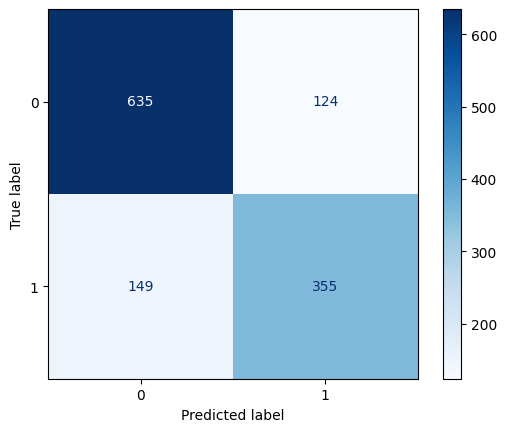

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_display = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,
                                               cmap=plt.cm.Blues,normalize=None)